# Ch7. 시계열 분석

## 7.1 시계열 문제
- 시간에 따라 변하는 데이터를 사용해 추이를 분석하는 것.
- 예) 주가/환율 변동 및 기온/습도 변화 등
- 시계열 형태
  - 불규칙 변동: 시간에 따른 규칙적인 움직임과 달리 어떤 규칙성이 없어 예측 불가능하고 우연적으로 발생하는 변동
  - 추세 변동: 시계열 자료가 갖는 장기적인 변화 추세를 의미. 추세란 장기간에 걸쳐 지속적으로 증가/감소하거나 또는 일정한 상태를 유지하려는 성향을 의미해 짧은 기간 동안에는 추세 변동을 찾기 어려운 단점이 있음.
  - 순환 변동: 대체로 2~3년 정도의 일정한 기간을 주기로 순환적으로 나타나는 변동을 의미. 즉, 1년 이내 주기로 곡선을 그리며 추세 변동에 따라 변동하는 것
  - 계절 변동: 시계열 자료에서 보통 계절적 영향과 사회적 관습에 따라 1년 주기로 발생하는 것을 의미

- 시계열 데이터는 규칙적 시계열과 불규칙적 시계열로 나눌 수 있음.
  - 규칙적 시계열: 트렌드와 분산이 불변한 데이터
  - 불규칙적 시계열: 트렌드 혹은 분산이 변화하는 시계열 데이터

- 불규칙성을 갖는 시계열 데이터에 특정한 기법이나 모델을 적용해 규칙적 패턴을 찾거나 예측하는 것을 의미
- AR, MA, ARMA, ARIMA 모델을 적용하는 것이 가장 널리 알려짐.

## 7.2 AR, MA, ARMA, ARIMA

- 독립 변수를 사용해 종속 변수를 예측하는 일반적ㅇ니 ML에서 시간을 독립 변수로 사용한다는 특징이 있음.

### 7.2.1 AR 모델
- 이전 관측 값이 이후 관측 값에 영향을 준다는 아이디어에 대한 모형으로 자기 회귀 모델이라고도 함.

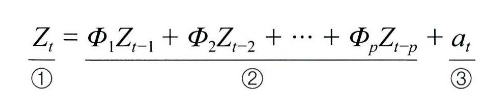

1. 시계열 데이터에서 현재 시점을 의미
2. 과거가 현재에 미치는 영향ㅇ르 나타내는 모수에 시계열 데이터의 과거 시점을 곱한 것
3. 시계열 분석에서 오차 항을 의미하며 백색 잡음이라고도 함.

### 7.2.2 MA(이동 평균) 모델

- 트렌드가 변화하는 상황에 적합한 회귀 모델
- 이동 평균 모델에서는 윈도우라는 개념을 사용
- 시계열을 따라 윈도우 크기만큼 슬라이딩된다고 하여 이동 평균 모델이라고 함.

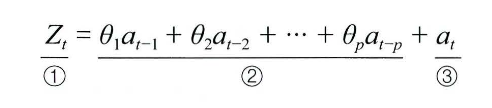

1. 시계열 데이터에서 현재 시점을 의미
2. 매개변수에 과거 시점의 오차를 곱한 것
3. 오차 항을 의미

### 7.2.3 ARMA(자귀 회귀 이동 평균) 모델
- AR, MA를 섞은 모델로 연구 기관에서 주로 사용
- AR, MA 두 가지 관점에서 과거의 데이터를 사용하는 것

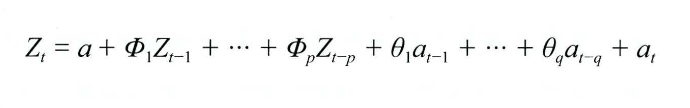

### 7.2.4 ARIMA(자기 회귀 누적 이동 평균) 모델
- 자기 회귀와 이동 평균을 둘 다 고려하는 모형
- ARMA와 달리 과거 데이터의 선형 관계뿐만 아니라 추세까지 고려한 모델임.
- statsmodels 라이브러리를 이용해 ARIMA 모델을 구현

1. ARIMA() 함수를 호출해 사용, ARIMA(p,d,q) 함수에서 쓰는 파라미터는 다음과 같음.
- p: 자기 회귀 차수
- d: 차분 차수
- q: 이동 평균 차수

2. fit() 메서드를 호출하고 모델에 데이터를 적용해 훈련 시킴.

3. predict() 메서드를 호출해 미래의 추세 및 동향에 대해 예측함.

In [1]:
!conda install -c conda-forge statsmodels

/bin/bash: line 1: conda: command not found


In [2]:
!pip install statsmodels

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/tmp/ipython-input-1920723848.py:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('/content/drive/MyDrive/dnn/chap07/data/sales.csv', header=0, parse_dates=[0], index_col=0,
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -199.651
Date:                Wed, 26 Nov 2025   AIC                            411.302
Time:                        04:59:50   BIC                            420.634
Sample:                    01-01-1991   HQIC                           414.523
                         - 12-01-1993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8788      0.227     -3.876      0.000      -1.323      -0.434
ar.L2         -0.2787      0.232     -1.203      0.229      -0.733       0.176
ar.L3         -0.0076      0.270     -0.028      0.9

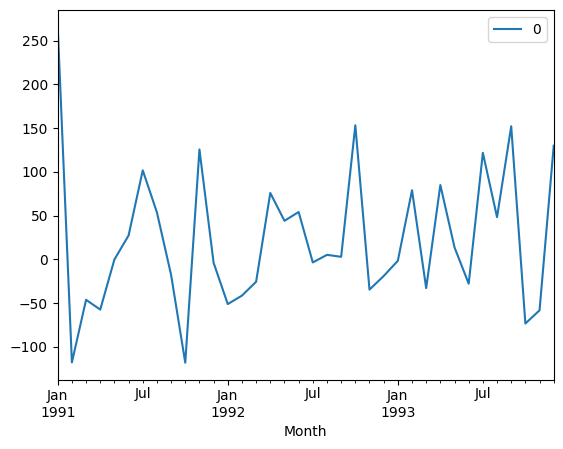

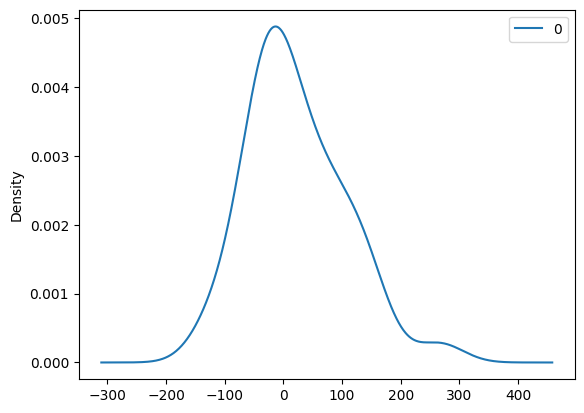

                0
count   36.000000
mean    22.459086
std     82.505331
min   -118.213281
25%    -33.308343
50%      1.361178
75%     76.704967
max    266.000000


In [15]:
# ARIMA 함수를 호출하여 sales 데이터셋에 대한 예측
from pandas import read_csv
from datetime import datetime
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

def parser(x): # 시간을 표현하는 함수 정의
  return datetime.strptime('199'+x, '%Y-%m')

series = read_csv('/content/drive/MyDrive/dnn/chap07/data/sales.csv', header=0, parse_dates=[0], index_col=0,
                  date_parser=parser)
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

/tmp/ipython-input-2956122325.py:12: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('/content/drive/MyDrive/dnn/chap07/data/sales.csv', header=0, parse_dates=[0], index_col=0,
/tmp/ipython-input-2956122325.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=352.855343, expected=346.300000
predicted=277.398036, expected=329.700000
predicted=368.753734, expected=445.400000
predicted=331.773635, expected=325.900000
predicted=372.070407, expected=449.300000
predicted=360.020872, expected=411.300000
predicted=454.526230, expected=417.400000
predicted=388.690699, expected=545.500000
predicted=437.632447, expected=477.600000
predicted=516.437624, expected=687.000000
predicted=520.916191, expected=435.300000
predicted=675.594647, expected=587.300000
predicted=505.201016, expected=676.900000
Test MSE: 9118.818


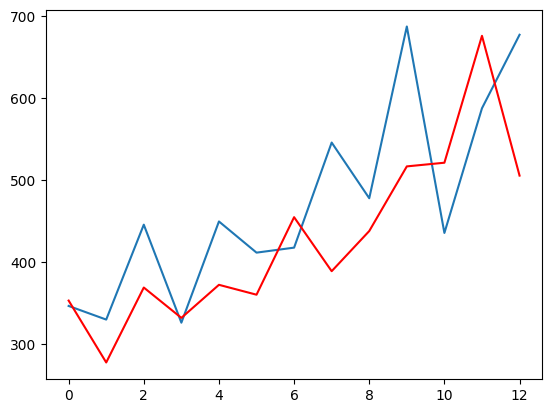

In [19]:
# statsmodels 라이브러리를 이용한 sales 데이터셋 예측
import numpy as np
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
  return datetime.strptime('199'+x, '%Y-%m')

series = read_csv('/content/drive/MyDrive/dnn/chap07/data/sales.csv', header=0, parse_dates=[0], index_col=0,
                  date_parser=parser)
X = series.values
X = np.nan_to_num(X)
size = int(len(X)*0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
  model = ARIMA(history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f'%error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## 7.3 순환 신경망(RNN)

- 시간적으로 연속성이 있는 데이터를 처리하려고 고안된 인공신경망
- 'Recurrent(반복되는)'는 이전 은닉층이 현재 은닉층의 입력이 되면서 반복된느 순환 구조를 갖는다는 의미
- 기존 네트워크와 다른 점은 '기억'을 갖는다는 것

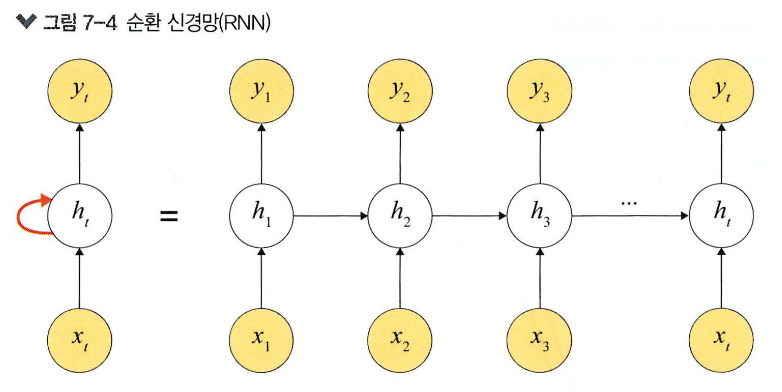

첫 번째 입력(x1)이 들어오면 첫 번째 기억(h1)이 만들어지고, 두 번째 입력(x2)이 들어오면 기존 기억(h1)과 새로운 입력을 참고해 새 기억(h2)을 만듦.

즉, RNN은 외부 입력과 자신의 이전 상태를 입력받아 현재 상태를 갱신함.

RNN은 입력과 출력에 따라 유형을 다양함.
1. 일대일: 순환이 없기 때문에 RNN이라고 말하기 어려우며, 순방향 네트워크가 대표적 사례임.
2. 일대다: 입력이 하나이고, 출력이 다수인 구조. 이미지를 입력해 이미지에 대한 설명을 문장으로 출력하는 이비지 캡션이 대표적 사례임.
3. 다대일: 입력이 다수이고 출력이 하나인 구조로, 문장을 입력해 긍정/부정을 출력하는 감성 분석기에서 사용됨.

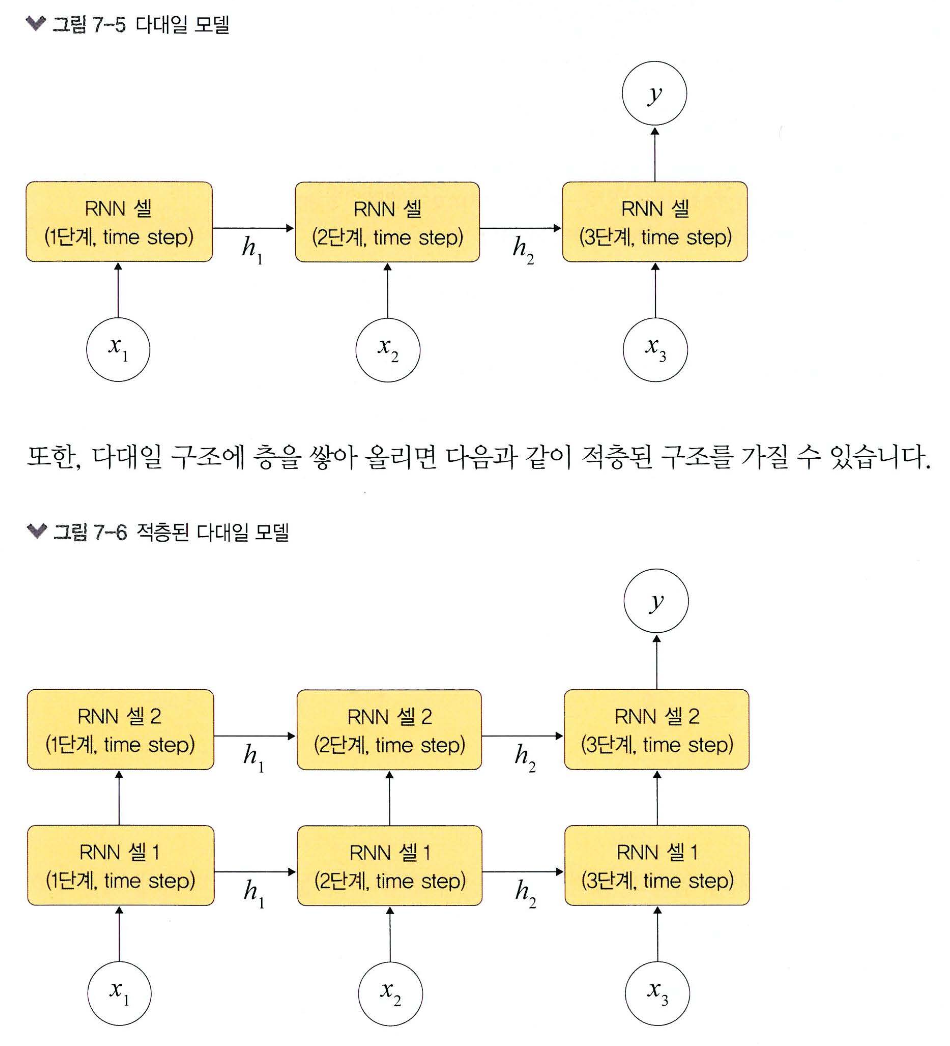

4. 다대다: 입력과 출력이 다수인 구조로, 언어가 번역하는 자동 번역기 등이 대표적인 사례
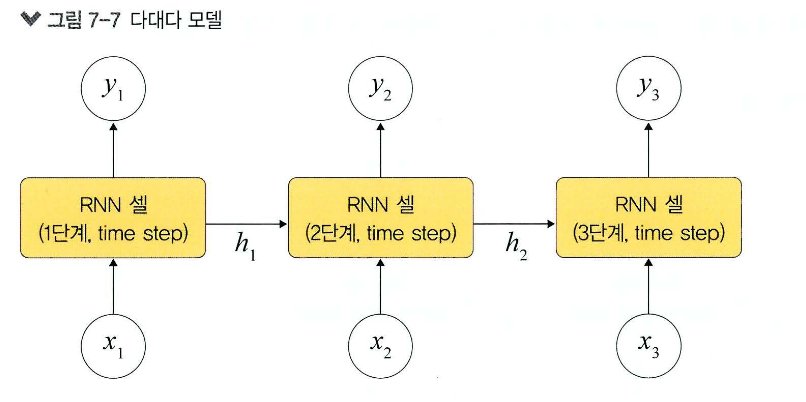

5. 동기화 다대다: 4의 유형처럼 입력과 출력이 다수인 구조. 문장에서 다음에 나올 단어를 예측하는 언어 모델, 프레임 수준의 비디오 분류가 대표적 사례임.

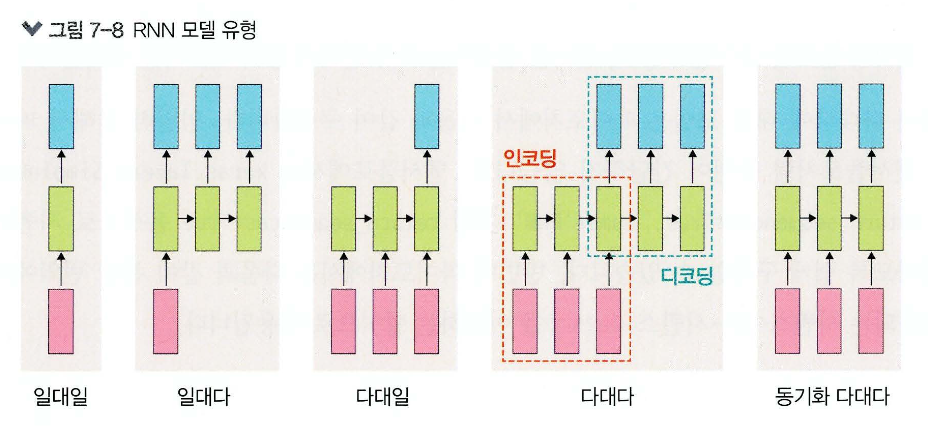

### 7.3.1 RNN 계층과 셀

- RNN은 내장된 계층뿐만 아니라 셀 레벨의 API도 제공함.
- RNN 계층이 입력된 배치 순서대로 모두 처리하는 것과 다르게 RNN 셀은 오직 하나의 단계만 처리함.
- RNN 셀은 RNN 계층의 for loop 구문을 갖는 구조라고 할 수 있음.

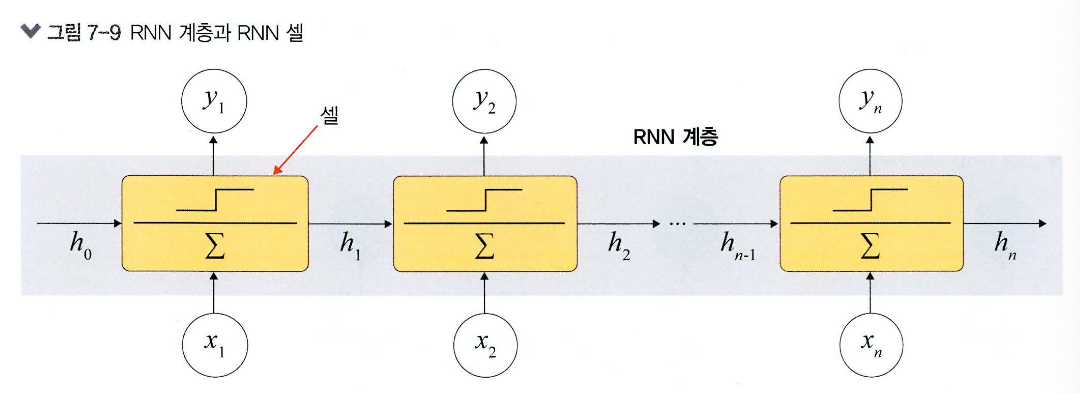

- RNN 계층은 셀을 래핑해 동일한 셀을 여러 단계에 적용함.
- 셀은 실제 계산에 사용되는 RNN 계층의 구성 요소로, 단일 입력과 과거 상태를 가져와서 출력과 새로운 상태를 생성함.
- 셀 유형
  - nn.RNNCell: SimpleRNN 계층에 대응되는 RNN 셀
  - nn.GPUCell: GRU 계층에 대응되는 GRU 셀
  - nn.LSTMCell: LSTM 계층에 대응되는 LSTM 셀

- RNN 활용 분야: 자연어 처리
  - 연속적인 단어들의 나열인 언어(자연어) 처리는 음성 인식, 단어의 의미 판단 및 대화 등에 대한 처리가 가능함.
  - 이외에도 손글씨, 센서 데이터 등 시계열 데이터 처리에 활용됨.

# RNN 실습

## 1. 문자 단위 RNN(Char RNN)

In [20]:
# 필요한 도구들 임포트
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [22]:
# 훈련 데이터 전처리
input_str = 'apple'
label_str = 'pple!'
char_vocab = sorted(list(set(input_str+label_str)))
vocab_size = len(char_vocab)
print('문자 집합의 크기 : {}'.format(vocab_size))

문자 집합의 크기 : 5


In [23]:
input_size = vocab_size # 입력의 크기는 문자 집합의 크기
hidden_size = 5
output_size = 5
learning_rate = 0.1

In [24]:
char_to_index = dict((c,i) for i, c in enumerate(char_vocab)) # 문자에 고유한 정수 인덱스 부여
print(char_to_index)

{'!': 0, 'a': 1, 'e': 2, 'l': 3, 'p': 4}


In [26]:
index_to_char = {}
for key, value in char_to_index.items():
  index_to_char[value] = key
print(index_to_char)

{0: '!', 1: 'a', 2: 'e', 3: 'l', 4: 'p'}


In [27]:
x_data = [char_to_index[c] for c in input_str]
y_data = [char_to_index[c] for c in label_str]
print(x_data)
print(y_data)

[1, 4, 4, 3, 2]
[4, 4, 3, 2, 0]


In [28]:
# 파이토치의 nn.RNN()은 기본적으로 3차원 텐서를 입력받음.
# 배치 차원 추가
# 텐서 연산인 unsqueeze(0)를 통해 해결할 수도 있었음.
x_data = [x_data]
y_data = [y_data]
print(x_data)
print(y_data)

[[1, 4, 4, 3, 2]]
[[4, 4, 3, 2, 0]]


In [30]:
x_one_hot = [np.eye(vocab_size)[x] for x in x_data]
print(x_one_hot)

[array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])]


In [31]:
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

/tmp/ipython-input-2348034151.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:253.)
  X = torch.FloatTensor(x_one_hot)


In [32]:
print('훈련 데이터의 크기: {}'.format(X.shape))
print('레이블의 크기: {}'.format(Y.shape))

훈련 데이터의 크기: torch.Size([1, 5, 5])
레이블의 크기: torch.Size([1, 5])


In [39]:
# 모델 구현하기
# fc는 완전 연결층을 의미하며 출력층으로 사용됨.
class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True) # RNN 셀 구현
        self.fc = torch.nn.Linear(hidden_size, output_size, bias=True) # 출력층 구현

    def forward(self, x): # 구현한 RNN 셀과 출력층을 연결
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [40]:
net = Net(input_size, hidden_size, output_size)

In [41]:
outputs = net(X)
print(outputs.shape) # 3차원 텐서

torch.Size([1, 5, 5])


In [42]:
print(Y.shape)
print(Y.view(-1).shape)

torch.Size([1, 5])
torch.Size([5])


In [43]:
torch.Size([1,5])
torch.Size([5])

torch.Size([5])

In [44]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [46]:
for i in range(100):
  optimizer.zero_grad()
  outputs = net(X)
  loss = criterion(outputs.view(-1, input_size), Y.view(-1)) # view를 하는 이유는 Batch 차원 제거를 위해
  loss.backward() # 기울기 계산
  optimizer.step() # 아까 optimizer 선언 시 넣어둔 파라미터 업데이터

  # 아래 세 줄은 모델이 실제 어떻게 예측했는지를 확인하기 위한 코드.
  result = outputs.data.numpy().argmax(axis=2) # 최종 예측값인 각 time-step 별 5차원 벡터에 대해 가장 높은 값의 인덱스를 선택
  result_str = ''.join([index_to_char[c] for c in np.squeeze(result)])
  print(i, "loss:", loss.item(), "predidction:", result, "true Y:", y_data, "prediction str:", result_str)

0 loss: 1.5144538879394531 predidction: [[4 4 4 4 4]] true Y: [[4, 4, 3, 2, 0]] prediction str: ppppp
1 loss: 1.2904131412506104 predidction: [[4 4 4 4 4]] true Y: [[4, 4, 3, 2, 0]] prediction str: ppppp
2 loss: 1.1481897830963135 predidction: [[4 4 4 4 0]] true Y: [[4, 4, 3, 2, 0]] prediction str: pppp!
3 loss: 1.001191258430481 predidction: [[4 4 4 4 0]] true Y: [[4, 4, 3, 2, 0]] prediction str: pppp!
4 loss: 0.8756512403488159 predidction: [[4 4 0 4 0]] true Y: [[4, 4, 3, 2, 0]] prediction str: pp!p!
5 loss: 0.7895466089248657 predidction: [[4 4 0 4 0]] true Y: [[4, 4, 3, 2, 0]] prediction str: pp!p!
6 loss: 0.6860727071762085 predidction: [[4 4 0 2 0]] true Y: [[4, 4, 3, 2, 0]] prediction str: pp!e!
7 loss: 0.5984196066856384 predidction: [[4 4 4 2 0]] true Y: [[4, 4, 3, 2, 0]] prediction str: pppe!
8 loss: 0.5233179926872253 predidction: [[4 4 3 2 0]] true Y: [[4, 4, 3, 2, 0]] prediction str: pple!
9 loss: 0.44455450773239136 predidction: [[4 4 3 2 0]] true Y: [[4, 4, 3, 2, 0]] pr

## 더 많은 데이터를 학습한 문자 단위 RNN(Char RNN)

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim

In [48]:
# 훈련 데이터 전처리
sentence = ("if you want to build a ship, don't drum up people together to "
"collect wood and don't assign them tasks and work, but rather"
"teach them to long for the endless immensity of the sea.")

In [49]:
char_set = list(set(sentence)) # 중복을 제거한 문제 집합 생성
char_dic = {c: i for i, c in enumerate(char_set)} # 각 문자에 정수 인코딩

In [50]:
print(char_dic) # 공백이 여기서도 하나의 원소

{',': 0, 'b': 1, '.': 2, 'p': 3, 'k': 4, 'g': 5, 'y': 6, 'n': 7, 'l': 8, "'": 9, 's': 10, 'u': 11, 'c': 12, 'r': 13, ' ': 14, 'a': 15, 't': 16, 'i': 17, 'o': 18, 'w': 19, 'h': 20, 'm': 21, 'e': 22, 'f': 23, 'd': 24}


In [51]:
dic_size = len(char_dic)
print('문자 집합의 크기: {}'.format(dic_size))

문자 집합의 크기: 25


In [52]:
# 하이퍼파라미터 설정
hidden_size = dic_size
sequence_length = 10 # 임의 숫자 지정
learning_rate = 0.1

In [53]:
# 데이터 구성
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length):
  x_str = sentence[i:i + sequence_length]
  y_str = sentence[i+1: i+sequence_length+1]
  print(i, x_str, '->', y_str)

  x_data.append([char_dic[c] for c in x_str]) # x str to index
  y_data.append([char_dic[c] for c in y_str]) # y str to index

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [54]:
print(x_data[0])
print(y_data[0])

[17, 23, 14, 6, 18, 11, 14, 19, 15, 7]
[23, 14, 6, 18, 11, 14, 19, 15, 7, 16]


In [55]:
x_one_hot = [np.eye(dic_size)[x] for x in x_data] # x 데이터는 원-핫 인코딩
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [56]:
print('훈련 데이터의 크기: {}'.format(X.shape))
print('레이블의 크기: {}'.format(Y.shape))

훈련 데이터의 크기: torch.Size([169, 10, 25])
레이블의 크기: torch.Size([169, 10])


In [57]:
print(X[0])

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [60]:
# 모델 구현하기
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers): # 현재 hidden_size는 dic_size와 같음.
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [61]:
net = Net(dic_size, hidden_size, 2) # 이번에는 층을 두 개 쌓음.

In [62]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [63]:
outputs = net(X)
print(outputs.shape)

torch.Size([169, 10, 25])


In [64]:
torch.Size([170,10,25])

torch.Size([170, 10, 25])

In [65]:
print(Y.shape)
print(Y.view(-1).shape)

torch.Size([169, 10])
torch.Size([1690])


In [66]:
torch.Size([170,10])
torch.Size([1700])

torch.Size([1700])

In [67]:
# 옵티마이저와 손실 함수 정의
for i in range(100):
  optimizer.zero_grad()
  outputs = net(X) # (170,10,25) 크기를 가진 텐서를 매 에포크마다 모델의 입력으로 사용
  loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
  loss.backward()
  optimizer.step()

  # results의 텐서 크기는 (170,10)
  results = outputs.argmax(dim=2)
  predict_str = ""
  for j, result in enumerate(results):
    if j==0: # 처음에는 예측 결과를 전부 가져오지만
      predict_str += ''.join([char_set[t] for t in result])
    else: # 그 다음에는 마지막 글자만 반복 추가
      predict_str += char_set[result[-1]]
  print(predict_str)


bbooooosooooooooooooooooooosooooooooooooosoososoooooooossoosoooooooooooooooooooooooooooooosoooooosooboooooooosooosooooooooossoooosoooooooooooooooossooooooooooooososooooosoooooooo
                                                                                                                                                                                  
llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllll
tttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttt
eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee
e                                                                                                        